In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv as read
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN, KMeans

In [2]:
from sklearn.datasets import make_classification
x, y = make_classification(scale=1)

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
score1=cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

In [18]:
x1=copy.deepcopy(x)

In [19]:
data=pd.DataFrame(x1)
data['y']=y

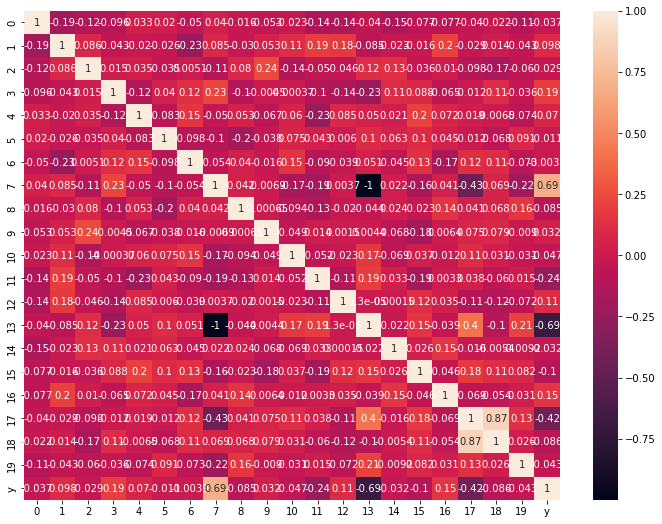

In [20]:
corr = data.corr()
names=data.columns
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
del data[13]
del data[17]
del data[6]
del data['y']

In [126]:
score2=cross_val_score(LogisticRegression(), data, y, scoring='accuracy').mean()

In [127]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.8)
x2=selector.fit_transform(x)
score3=cross_val_score(LogisticRegression(), x2, y, scoring='accuracy').mean()

In [128]:
from sklearn.feature_selection import SelectKBest
x3 = SelectKBest(k=5).fit_transform(x, y)
score4=cross_val_score(LogisticRegression(), x3, y, scoring='accuracy').mean()

In [37]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression()).fit(x, y)
x4=selector.transform(x);
score5=cross_val_score(LogisticRegression(), x4, y, scoring='accuracy').mean()

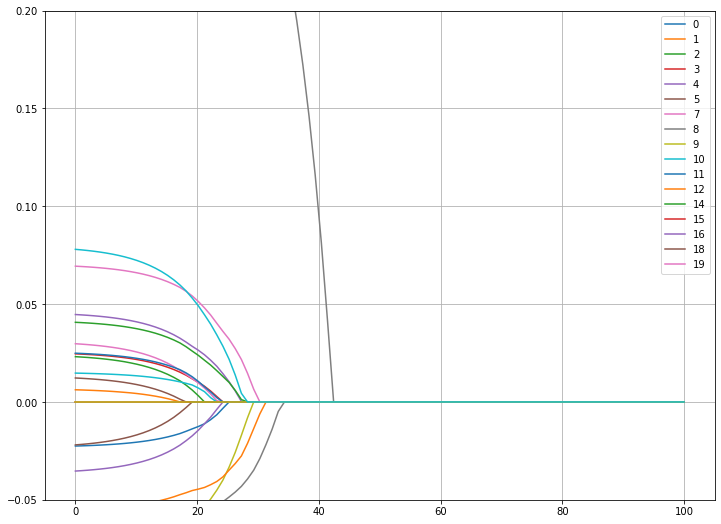

In [134]:
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

x5 = StandardScaler().fit_transform(x) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(x5, y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(names)      
plt.grid()

In [135]:
score6=cross_val_score(LogisticRegression(), x5[:,[8,3,12,7]], y, scoring='accuracy').mean()

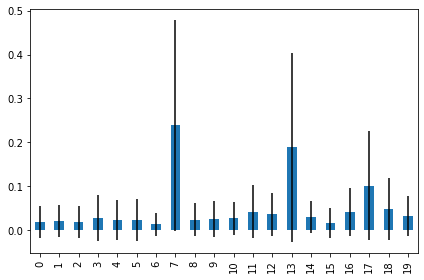

In [106]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x, y)
importances = clf.feature_importances_
forest_importances = pd.Series(importances)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

fig.tight_layout()

In [137]:
score7=cross_val_score(LogisticRegression(), x[:,[7,13,17]], y, scoring='accuracy').mean()

In [139]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
sfs.fit(x, y)
x6=sfs.transform(x)
score8=cross_val_score(LogisticRegression(), x6, y, scoring='accuracy').mean()

In [156]:
print('| Способ выбора признаков    | Количество признаков | Средняя точность модели  |')
print(f'| Без отбора                 |          20          |          {score1:.4f}          |')
print(f'| Матрица корреляций         |          17          |          {score2:.4f}          |')
print(f'| VarianceThreshold          |          17          |          {score3:.4f}          |')
print(f'| SelectKBest                |          5           |          {score4:.4f}          |')
print(f'| SelectFromModel            |          7           |          {score5:.4f}          |')
print(f'| L1                         |          4           |          {score6:.4f}          |')
print(f'| feature_importances        |          3           |          {score7:.4f}          |')
print(f'| SequentialFeatureSelector  |          3           |          {score8:.4f}          |')

| Способ выбора признаков    | Количество признаков | Средняя точность модели  |
| Без отбора                 |          20          |          0.7900          |
| Матрица корреляций         |          17          |          0.8000          |
| VarianceThreshold          |          17          |          0.8000          |
| SelectKBest                |          5           |          0.8400          |
| SelectFromModel            |          7           |          0.8300          |
| L1                         |          4           |          0.8400          |
| feature_importances        |          3           |          0.8300          |
| SequentialFeatureSelector  |          3           |          0.8500          |
